In [1]:
# <- Librerias para manejo de datos ->
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# <- Librerias para visualización de datos ->
import seaborn as sns
import matplotlib.pyplot as plt

## Importación y lectura de `csv`:

In [2]:
# lectura del csv
file_id = '1pab3helt00q2mIOxUoQOfOZOt9xzyMhb'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(url)

In [3]:
# info del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_ingreso          170807 non-null  object 
 1   destino_provincia      170807 non-null  object 
 2   destino_localidad      170807 non-null  object 
 3   cantidad_certificados  170807 non-null  int64  
 4   cantidad_personas      84914 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.5+ MB


In [4]:
# muestra aleatoria
df.sample(n=5, random_state=42)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
116235,2021-01-31,Santa Fe,Tortugas,1,4.0
164762,2021-02-26,Santa Fe,Cañada Rosquin,0,NaN
126173,2021-02-06,Cordoba,Laguna Larga,2,2.0
16816,2020-12-09,Tucumán,El Timbó,0,NaN
8449,2020-12-05,Jujuy,Rosario de Río Grande,0,NaN


## Atributos `loc` e `iloc` de pandas:

### Atributo `loc`:

In [5]:
help(df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [6]:
# documentación de .loc

help(pd.DataFrame.loc)

Help on property:

    Access a group of rows and columns by label(s) or a boolean array.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.
    
      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included
    
    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - An alignable boolean Series. The index of the key will be aligned before
      masking.
    - An alignable Index. The Index of the returned selection will be the input.
    - A ``callable`` function with one argument (the calling Series or
      DataFrame) and that

Accediendo a indices:

In [7]:
df.head()

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0
2,2020-12-01,Buenos Aires,Alberti,0,NaN
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0


In [8]:
# un solo indice -> indice 3

df.loc[3, :]

,3
fecha_ingreso,2020-12-01
destino_provincia,Buenos Aires
destino_localidad,Almirante Brown
cantidad_certificados,0
cantidad_personas,NaN


In [9]:
# accediendo a mas de un indice -> [3, 7]

df.loc[[3,7], :]

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN
7,2020-12-01,Buenos Aires,Azul,0,NaN


Accediendo a columnas:

In [10]:
# accediendo a columna 'destino_provincia'
df.loc[:, 'destino_provincia']

,destino_provincia
0,Buenos Aires
1,Buenos Aires
2,Buenos Aires
3,Buenos Aires
4,Buenos Aires
...,...
170802,Tucumán
170803,Tucumán
170804,Tucumán
170805,Tucumán


In [11]:
# Accediendo a mas de una columna -> ['destino_provincia', 'destino_localidad', 'cantidad_personas']
df.loc[:, ['destino_provincia', 'destino_localidad', 'cantidad_personas']]

,destino_provincia,destino_localidad,cantidad_personas
0,Buenos Aires,Adolfo Gonzáles Chaves,2.0
1,Buenos Aires,Aguas Verdes,18.0
2,Buenos Aires,Alberti,NaN
3,Buenos Aires,Almirante Brown,NaN
4,Buenos Aires,ARRECIFES,2.0
...,...,...,...
170802,Tucumán,Villa de Leales,NaN
170803,Tucumán,Villa Quinteros,NaN
170804,Tucumán,Yánima,NaN
170805,Tucumán,Yerba Buena,13.0


Accediendo a grupos de columnas e indices en especifico:

In [12]:
# indices -> [3, 7]
# columnas -> ['destino_provincia', 'destino_localidad', 'cantidad_personas']
df.loc[[3, 7], ['destino_provincia', 'destino_localidad', 'cantidad_personas']]

,destino_provincia,destino_localidad,cantidad_personas
3,Buenos Aires,Almirante Brown,NaN
7,Buenos Aires,Azul,NaN


### Atributo `.iloc`:

In [13]:
#documentación de iloc

help(df.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  .. deprecated:: 2.2.0
 |  
 |     Returning a tuple from a callable is deprecated.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on
 |    some value.
 |  - A tuple of row and column indexes. The tuple elements consist of one of the
 |    abov

Accediendo a indices:

In [14]:
df.sample()

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
80444,2021-01-12,Santa Fe,Los Molinos,0,NaN


In [15]:
# un solo indice -> indice 3
df.iloc[3, :]

,3
fecha_ingreso,2020-12-01
destino_provincia,Buenos Aires
destino_localidad,Almirante Brown
cantidad_certificados,0
cantidad_personas,NaN


In [16]:
# accediendo a mas de un indice -> [3, 7]
df.iloc[[3, 7],:]

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN
7,2020-12-01,Buenos Aires,Azul,0,NaN


Accediendo a columnas:

In [17]:
# accediendo a columna 'destino_provincia'
df.iloc[:,1]

,destino_provincia
0,Buenos Aires
1,Buenos Aires
2,Buenos Aires
3,Buenos Aires
4,Buenos Aires
...,...
170802,Tucumán
170803,Tucumán
170804,Tucumán
170805,Tucumán


In [18]:
# Accediendo a mas de una columna -> ['destino_provincia', 'destino_localidad', 'cantidad_personas']
df.iloc[:, [1,2,4]]

,destino_provincia,destino_localidad,cantidad_personas
0,Buenos Aires,Adolfo Gonzáles Chaves,2.0
1,Buenos Aires,Aguas Verdes,18.0
2,Buenos Aires,Alberti,NaN
3,Buenos Aires,Almirante Brown,NaN
4,Buenos Aires,ARRECIFES,2.0
...,...,...,...
170802,Tucumán,Villa de Leales,NaN
170803,Tucumán,Villa Quinteros,NaN
170804,Tucumán,Yánima,NaN
170805,Tucumán,Yerba Buena,13.0


Accediendo a grupos de columnas e indices en especifico:

In [19]:
# indices -> [3, 7]
# columnas -> ['destino_provincia', 'destino_localidad', 'cantidad_personas']
df.iloc[[3, 7], [1,2,4]]

,destino_provincia,destino_localidad,cantidad_personas
3,Buenos Aires,Almirante Brown,NaN
7,Buenos Aires,Azul,NaN


## Método `.groupby()`:

In [20]:
# documetación del método .groupby()

help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.frame:

groupby(self, by=None, axis: 'Axis | lib.NoDefault' = <no_default>, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'DataFrameGroupBy'
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        alig

### Agrupando por una sola columna:

In [21]:
df.columns

Index(['fecha_ingreso', 'destino_provincia', 'destino_localidad',
       'cantidad_certificados', 'cantidad_personas'],
      dtype='object')

In [22]:
df['destino_provincia']

,destino_provincia
0,Buenos Aires
1,Buenos Aires
2,Buenos Aires
3,Buenos Aires
4,Buenos Aires
...,...
170802,Tucumán
170803,Tucumán
170804,Tucumán
170805,Tucumán


In [23]:
# agrupando por una columna
df_group_prov = df.groupby(by='destino_provincia', as_index=False)
# df_group_prov.get_group('Cordoba')

In [24]:
# accediendo a ciertas columnas luego de la agrupación
df_group_prov_loc = df_group_prov['destino_localidad']

In [25]:
# viendo los resultados para un grupo en particular con .get_group()
df_group_prov_loc.get_group('Buenos Aires')

,destino_localidad
0,Adolfo Gonzáles Chaves
1,Aguas Verdes
2,Alberti
3,Almirante Brown
4,ARRECIFES
...,...
169093,Villarino
169094,Villa Serrana de la Gruta
169095,Villa Turística 7 de Marzo
169096,Villa Ventana


In [26]:
# equivalencia de .get_group() utilizando mascaras
mascara_columna_prov_cordoba = df['destino_provincia'] == 'Cordoba'
df[mascara_columna_prov_cordoba]

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas
246,2020-12-01,Cordoba,Achiras,0,NaN
247,2020-12-01,Cordoba,Adelia María,0,NaN
248,2020-12-01,Cordoba,Agua de Oro,0,NaN
249,2020-12-01,Cordoba,Alcira Gigena,0,NaN
250,2020-12-01,Cordoba,Aldea Santa María,0,NaN
...,...,...,...,...,...
169589,2021-03-01,Cordoba,Villa Tulumba,1,2.0
169590,2021-03-01,Cordoba,Villa Valeria,1,1.0
169591,2021-03-01,Cordoba,Villa Yacanto,32,77.0
169592,2021-03-01,Cordoba,Washington,0,NaN


In [27]:
# aplicando una función de agregación
df_group_prov_loc.agg(func={'destino_localidad':np.unique})

<ipython-input-27-95bd99f09758>:2: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  df_group_prov_loc.agg(func={'destino_localidad':np.unique})


,destino_provincia,destino_localidad
0,Buenos Aires,"[ARRECIFES, Adolfo Gonzáles Chaves, Aguas Verd..."
1,Catamarca,"[Aconquija, Ancasti, Andalgalá, Antofagasta de..."
2,Chubut,"[28 de Julio, Aldea Apeleg, Aldea Beleiro, Ald..."
3,Cordoba,"[Achiras, Adelia María, Agua de Oro, Alcira Gi..."
4,Entre Rios,"[Alcaraz, Alcaraz Norte, Alcaraz Sur, Aldea As..."
5,Jujuy,"[Abdón Castro Tolay, Abra Pampa, Abralaite, Ag..."
6,La Rioja,"[Arauco, Castro Barros, Chamical, Chilecito, C..."
7,Mendoza,"[25 de Mayo, Agua Amarga, Bardas Blancas, Cach..."
8,Misiones,"[Alba Posse, Almafuerte, Apóstoles, Aristóbulo..."
9,Neuquén,"[Aluminé, Andacollo, Añelo, Bajada del Agrio, ..."


### Agrupando por mas de una columna:

In [28]:
help(pd.core.groupby.generic.DataFrameGroupBy)

Help on class DataFrameGroupBy in module pandas.core.groupby.generic:

class DataFrameGroupBy(pandas.core.groupby.groupby.GroupBy)
 |  DataFrameGroupBy(obj: 'NDFrameT', keys: '_KeysArgType | None' = None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, grouper: 'ops.BaseGrouper | None' = None, exclusions: 'frozenset[Hashable] | None' = None, selection: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'None'
 |  
 |  Method resolution order:
 |      DataFrameGroupBy
 |      pandas.core.groupby.groupby.GroupBy
 |      pandas.core.groupby.groupby.BaseGroupBy
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      typing.Generic
 |      pandas.core.groupby.indexing.GroupByIndexingMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key) -> 'DataFrameGrou

In [29]:
# agrupando por dos columnas

df_group_prov_loc = df.groupby(by=['destino_provincia', 'destino_localidad'], as_index=False)

In [30]:
# accediendo a ciertas columnas luego de la agrupación
# Aplicando una función de agregación sobre el dataframe agrupado y con columnas ya seleccionadas

df_group_prov_loc[['cantidad_personas', 'cantidad_certificados']].agg({'cantidad_personas':'sum', 'cantidad_certificados':['count', 'sum']})

destino_provincia           destino_localidad cantidad_personas  \
                                                                 sum   
0         Buenos Aires                   ARRECIFES            1782.0   
1         Buenos Aires      Adolfo Gonzáles Chaves            6187.0   
2         Buenos Aires                Aguas Verdes           28839.0   
3         Buenos Aires                     Alberti            1194.0   
4         Buenos Aires             Almirante Brown            7220.0   
...                ...                         ...               ...   
1872           Tucumán                      Yánima              13.0   
1873           Tucumán      el Bracho y el Cevilar             103.0   
1874           Tucumán     el Naranjo y el Sunchal              45.0   
1875           Tucumán         la Ramada y la Cruz              81.0   
1876           Tucumán  los Bulacio y los Villagra              16.0   

     cantidad_certificados         
                     count    sum  
0                       91    920  
1                       91   3866  
2                       91  12685  
3                       91    691  
4                       91   4123  
...                    ...    ...  
1872                    91      5  
1873                    91     50  
1874                    91     17  
1875                    91     51  
1876                    91      9  

[1877 rows x 5 columns]

## Manejo de errores:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_ingreso          170807 non-null  object 
 1   destino_provincia      170807 non-null  object 
 2   destino_localidad      170807 non-null  object 
 3   cantidad_certificados  170807 non-null  int64  
 4   cantidad_personas      84914 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.5+ MB


In [32]:
# try, except para obtener el año de la columna 'fecha_ingreso'

try:
  df['fecha_ingreso'].dt.year
except  Exception as e:
  print(f'Eror al intentar obtener el año: {e}')

Eror al intentar obtener el año: Can only use .dt accessor with datetimelike values


In [33]:
# help sobre `raise`
help('raise')

The "raise" statement
*********************

   raise_stmt ::= "raise" [expression ["from" expression]]

If no expressions are present, "raise" re-raises the exception that is
currently being handled, which is also known as the *active
exception*. If there isn’t currently an active exception, a
"RuntimeError" exception is raised indicating that this is an error.

Otherwise, "raise" evaluates the first expression as the exception
object.  It must be either a subclass or an instance of
"BaseException". If it is a class, the exception instance will be
obtained when needed by instantiating the class with no arguments.

The *type* of the exception is the exception instance’s class, the
*value* is the instance itself.

A traceback object is normally created automatically when an exception
is raised and attached to it as the "__traceback__" attribute. You can
create an exception and set your own traceback in one step using the
"with_traceback()" exception method (which returns the same except

In [34]:
# 'raise' para evitar que se instancie un dataset con nulos

if pd.read_csv('/content/sample_data/certificados-personas-por-fecha-ingreso-provincia-localidad.csv').isnull().sum().sum() != 0:
  raise ValueError('El conjunto de datos contiene valores nulos.')
else:
  df = pd.read_csv('/content/sample_data/certificados-personas-por-fecha-ingreso-provincia-localidad.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/certificados-personas-por-fecha-ingreso-provincia-localidad.csv'

## Guardando el dataframe en una copia

In [35]:
# Utilizando .copy() para crear una copia del dataframe

df_procesado = df.copy(deep=True)

## Manejo de fechas:

### Pandas.to_datetime()

In [36]:
df_procesado.loc[0, 'fecha_ingreso']

'2020-12-01'

In [37]:
# documentación de Pandas.to_datetime()

help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    This function converts a scalar, array-like, :class:`Series` or
    :class:`DataFrame`/dict-like to a pandas datetime object.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime. If a :class:`DataFrame` is provided, the
        method expects minimally the following columns: :const:`"year"`,
        :const:`"mon

In [38]:
# Convertir la columna a tipo fecha
df_procesado['fecha_ingreso'] = pd.to_datetime(df_procesado['fecha_ingreso'], errors='coerce')

### pd.Series.dt

In [39]:
# documentación de Series.dt

help(pd.Series.dt)

Help on class CombinedDatetimelikeProperties in module pandas.core.indexes.accessors:

class CombinedDatetimelikeProperties(DatetimeProperties, TimedeltaProperties, PeriodProperties)
 |  CombinedDatetimelikeProperties(data: 'Series')
 |  
 |  Method resolution order:
 |      CombinedDatetimelikeProperties
 |      DatetimeProperties
 |      TimedeltaProperties
 |      PeriodProperties
 |      Properties
 |      pandas.core.accessor.PandasDelegate
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.NoNewAttributesMixin
 |      builtins.object
 |  
 |  Static methods defined here:
 |  
 |  __new__(cls, data: 'Series')
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  ----------------------------------------------------------------------
 |  Metho

In [40]:
# utilizando atributo .dt para acceder al año
df_procesado['fecha_ingreso'].dt.year

,fecha_ingreso
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
170802,2021
170803,2021
170804,2021
170805,2021


In [41]:
# utilizando atributo .dt para acceder al mes
df_procesado['fecha_ingreso'].dt.month

,fecha_ingreso
0,12
1,12
2,12
3,12
4,12
...,...
170802,3
170803,3
170804,3
170805,3


In [42]:
# utilizando atributo .dt para acceder al dia
df_procesado['fecha_ingreso'].dt.day

,fecha_ingreso
0,1
1,1
2,1
3,1
4,1
...,...
170802,1
170803,1
170804,1
170805,1


In [43]:
# Utilizando .dt.isocalendar() para acceder al año semana y dia al mismo tiempo

df_procesado['fecha_ingreso'].dt.isocalendar()

,year,week,day
0,2020,49,2
1,2020,49,2
2,2020,49,2
3,2020,49,2
4,2020,49,2
...,...,...,...
170802,2021,9,1
170803,2021,9,1
170804,2021,9,1
170805,2021,9,1


In [44]:
# .dt.strftime()

df_procesado['anio_ingreso'] = df_procesado['fecha_ingreso'].dt.strftime('%Y')

## Método apply para aplicar funciones sobre una columna o fila:

In [45]:
# documentación del metodo .apply()

help(pd.DataFrame.apply)

Help on function apply in module pandas.core.frame:

apply(self, func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None, args=(), by_row: "Literal[False, 'compat']" = 'compat', engine: "Literal['python', 'numba']" = 'python', engine_kwargs: 'dict[str, bool] | None' = None, **kwargs)
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply funct

### Cambios sobre una columna

In [46]:
# apply con función 'sqrt' de numpy sobre una columna especifica
df_procesado.select_dtypes(include='number').apply(np.sqrt)

,cantidad_certificados,cantidad_personas
0,1.000000,1.414214
1,2.236068,4.242641
2,0.000000,NaN
3,0.000000,NaN
4,1.000000,1.414214
...,...,...
170802,0.000000,NaN
170803,0.000000,NaN
170804,0.000000,NaN
170805,2.828427,3.605551


### Cambios sobre filas

In [47]:
# apply de np.sum() sobre una fila (solo sobre columnas numericas)

df_procesado.select_dtypes(exclude=['number', 'datetime']).apply(np.unique, axis=1)

,0
0,"[2020, Adolfo Gonzáles Chaves, Buenos Aires]"
1,"[2020, Aguas Verdes, Buenos Aires]"
2,"[2020, Alberti, Buenos Aires]"
3,"[2020, Almirante Brown, Buenos Aires]"
4,"[2020, ARRECIFES, Buenos Aires]"
...,...
170802,"[2021, Tucumán, Villa de Leales]"
170803,"[2021, Tucumán, Villa Quinteros]"
170804,"[2021, Tucumán, Yánima]"
170805,"[2021, Tucumán, Yerba Buena]"


## Funciones:

### Funciones incorporadas:

In [48]:
# type sobre la instancia 'df'
type(df_procesado)

pandas.core.frame.DataFrame

In [49]:
# print sobre un string
print('Hola')

Hola


In [50]:
# input

#nombre = input('Ingrese nombre: ')

### Funciones definidas por el usuario:

Definiendo e invocando funciónes:

In [51]:
# funcion sin parámetros y sin retorno de info (solo imprime un saludo)

def saludo():
  print('Hola')

saludo()

Hola


In [52]:
# funcion 'cuadrado' con parámetros y retorno de info

def cuadrado(x):
  resultado = x ** 2

  return resultado

cuadrado(3)

9

In [53]:
df_procesado.loc[:3, 'cantidad_personas']

,cantidad_personas
0,2.0
1,18.0
2,NaN
3,NaN


In [54]:
# aplicando la función 'cuadrado' con apply

df_procesado['cantidad_personas'].apply(cuadrado)

,cantidad_personas
0,4.0
1,324.0
2,NaN
3,NaN
4,4.0
...,...
170802,NaN
170803,NaN
170804,NaN
170805,169.0


### Funciones anonimas `lambda`:

Funciones lambda aplicada a una columna:

In [55]:
cuadrado(2)

4

In [56]:
# pseudo definicion de una función anonima 'cuadrado'
cuadrado = lambda x: x ** 2

# aplicando la función lambda 'cuadrado' desde apply
df_procesado['cantidad_personas'].apply(cuadrado)

,cantidad_personas
0,4.0
1,324.0
2,NaN
3,NaN
4,4.0
...,...
170802,NaN
170803,NaN
170804,NaN
170805,169.0


In [57]:
df_procesado['cantidad_personas']

,cantidad_personas
0,2.0
1,18.0
2,NaN
3,NaN
4,2.0
...,...
170802,NaN
170803,NaN
170804,NaN
170805,13.0


In [58]:
df_procesado['cantidad_personas'].apply(lambda x: x ** 2)

,cantidad_personas
0,4.0
1,324.0
2,NaN
3,NaN
4,4.0
...,...
170802,NaN
170803,NaN
170804,NaN
170805,169.0


In [59]:
# aplicando función lambda directamente sobre columna 'cantidad_certificados'
df_procesado['cantidad_certificados'].apply(lambda x: x ** 2)

,cantidad_certificados
0,1
1,25
2,0
3,0
4,1
...,...
170802,0
170803,0
170804,0
170805,64


In [60]:
df_procesado.dtypes

,0
fecha_ingreso,datetime64[ns]
destino_provincia,object
destino_localidad,object
cantidad_certificados,int64
cantidad_personas,float64
anio_ingreso,object


In [61]:
df_procesado

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,cantidad_personas,anio_ingreso
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1,2.0,2020
1,2020-12-01,Buenos Aires,Aguas Verdes,5,18.0,2020
2,2020-12-01,Buenos Aires,Alberti,0,NaN,2020
3,2020-12-01,Buenos Aires,Almirante Brown,0,NaN,2020
4,2020-12-01,Buenos Aires,ARRECIFES,1,2.0,2020
...,...,...,...,...,...,...
170802,2021-03-01,Tucumán,Villa de Leales,0,NaN,2021
170803,2021-03-01,Tucumán,Villa Quinteros,0,NaN,2021
170804,2021-03-01,Tucumán,Yánima,0,NaN,2021
170805,2021-03-01,Tucumán,Yerba Buena,8,13.0,2021


In [62]:
# utilizando `lambda` junto con `unique` de numpy para obtener los valores unicos de cada fila (axis=1)
result = df_procesado.select_dtypes('object').apply(lambda x: np.unique(x), axis=1)

In [63]:
result

,0
0,"[2020, Adolfo Gonzáles Chaves, Buenos Aires]"
1,"[2020, Aguas Verdes, Buenos Aires]"
2,"[2020, Alberti, Buenos Aires]"
3,"[2020, Almirante Brown, Buenos Aires]"
4,"[2020, ARRECIFES, Buenos Aires]"
...,...
170802,"[2021, Tucumán, Villa de Leales]"
170803,"[2021, Tucumán, Villa Quinteros]"
170804,"[2021, Tucumán, Yánima]"
170805,"[2021, Tucumán, Yerba Buena]"


Funciones lambda aplicada a una fila:

In [64]:
# mostrando la froma en que funciona `join` de python

var1 = 'hola'
var2 = 'chicos'

' '.join((var1, var2))

'hola chicos'

In [65]:
# utilizando `lambda` junto con `join` para concatenar cada registros de la columnas 'destino_localidad' y 'destino_provincia'

df_procesado['provincia_localidad'] = df_procesado[['destino_provincia', 'destino_localidad']].apply(lambda x: ' '.join(x), axis=1)

## Imputación

In [66]:
df_procesado.isnull().sum()

,0
fecha_ingreso,0
destino_provincia,0
destino_localidad,0
cantidad_certificados,0
cantidad_personas,85893
anio_ingreso,0
provincia_localidad,0


In [67]:
df_procesado.drop(columns=['cantidad_personas'], inplace=True)

Agregando nulos dummies

In [68]:
df_procesado.sample(5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,anio_ingreso,provincia_localidad
60191,2021-01-02,Buenos Aires,Saavedra,6,2021,Buenos Aires Saavedra
15478,2020-12-09,Cordoba,Los Cóndores,2,2020,Cordoba Los Cóndores
98917,2021-01-22,Salta,San José de Metán,44,2021,Salta San José de Metán
17101,2020-12-10,Chubut,Colan Conhué,0,2020,Chubut Colan Conhué
126844,2021-02-06,Misiones,Palmar del Río,0,2021,Misiones Palmar del Río


In [69]:
# utilizando .loc para remplazar algunos valores por np.nan dentro de columnas numericas (cantidad_certificados)

df_procesado.loc[[3,4,5,10,1000], 'cantidad_certificados']

,cantidad_certificados
3,0
4,1
5,0
10,0
1000,0


In [70]:
help(pd.DataFrame.replace)

Help on function replace in module pandas.core.generic:

replace(self, to_replace=None, value=<no_default>, *, inplace: 'bool_t' = False, limit: 'int | None' = None, regex: 'bool_t' = False, method: "Literal['pad', 'ffill', 'bfill'] | lib.NoDefault" = <no_default>) -> 'Self | None'
    Replace values given in `to_replace` with `value`.
    
    Values of the Series/DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_re

In [71]:
df_procesado.loc[[3,4,5,10,1000], 'cantidad_certificados'] = np.nan

In [72]:
df_procesado.loc[[3,4,5,10,1000], 'cantidad_certificados']

,cantidad_certificados
3,NaN
4,NaN
5,NaN
10,NaN
1000,NaN


Visualizando brevemente la distribución de las variables numericas

In [73]:
df_procesado.sample(n=5)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,anio_ingreso,provincia_localidad
88201,2021-01-16,Tucumán,Sargento Moya,0.0,2021,Tucumán Sargento Moya
83124,2021-01-14,Cordoba,Rincón,0.0,2021,Cordoba Rincón
154833,2021-02-21,Jujuy,Fraile Pintado,0.0,2021,Jujuy Fraile Pintado
126780,2021-02-06,Mendoza,Tupungato,25.0,2021,Mendoza Tupungato
85384,2021-01-15,Jujuy,Fraile Pintado,9.0,2021,Jujuy Fraile Pintado


In [74]:
from sklearn.impute import SimpleImputer

In [75]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
 |  
 |  Univariate imputer for completing missing values with simple strategies.
 |  
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      can be 

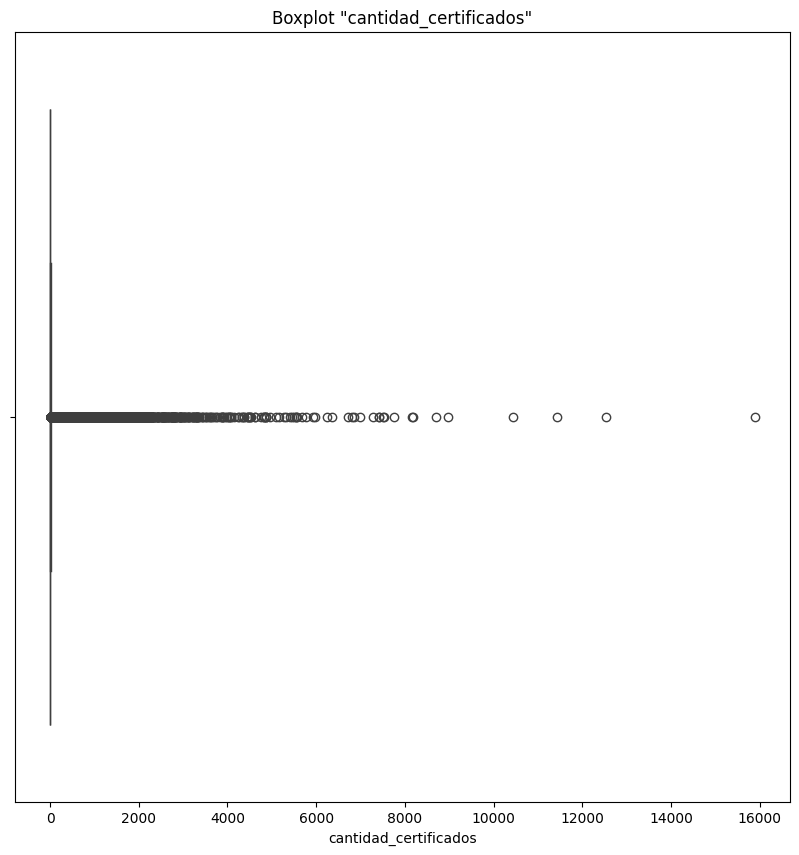

In [76]:
# kdeplot para la columna 'cantidad_certificados'

fig = plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=df_procesado, x='cantidad_certificados')
plt.title(label='Boxplot "cantidad_certificados"')
plt.show()

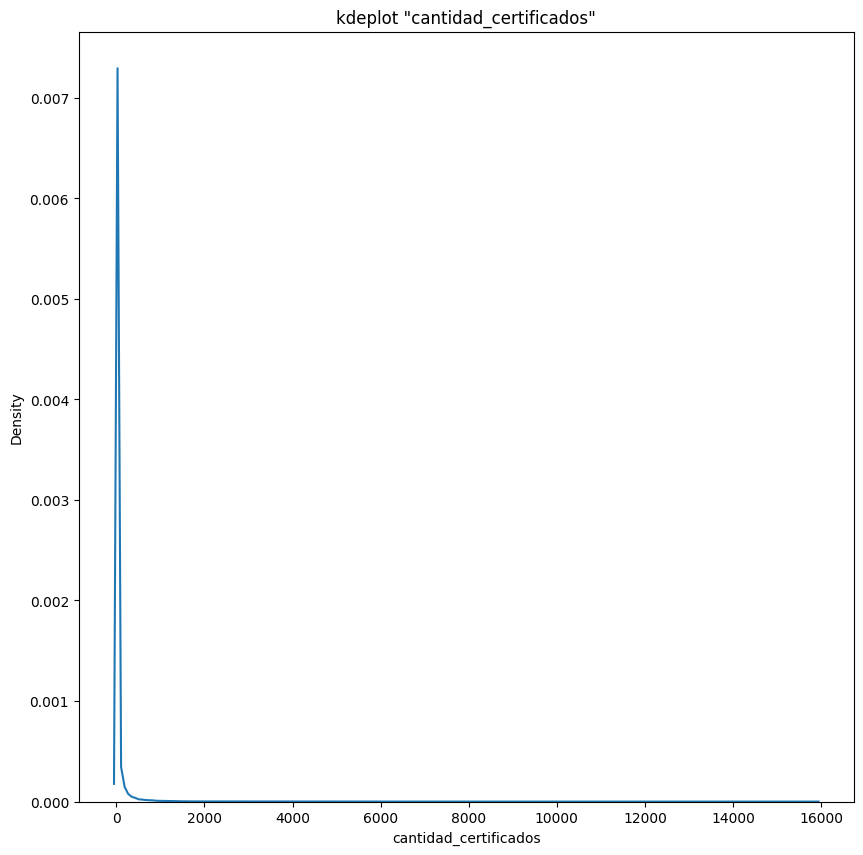

In [77]:
# kdeplot
fig = plt.figure(figsize=(10, 10))
ax = sns.kdeplot(data=df_procesado, x='cantidad_certificados')
plt.title(label='kdeplot "cantidad_certificados"')
plt.show()

SimpleImputer

In [78]:
df_procesado.loc[[3,4,5,10,1000], 'cantidad_certificados'] = -1

In [79]:
df_procesado['cantidad_certificados'].replace({-1:np.nan}, inplace=True)

<ipython-input-79-6cd9b3f949da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_procesado['cantidad_certificados'].replace({-1:np.nan}, inplace=True)


In [80]:
df_procesado.loc[[3,4,5,10,1000], 'cantidad_certificados']

,cantidad_certificados
3,NaN
4,NaN
5,NaN
10,NaN
1000,NaN


In [81]:
# instancia
simple_imputer = SimpleImputer(strategy='median',missing_values=np.nan)

In [82]:
# fit_transform
df['cantidad_certificados'] = simple_imputer.fit_transform(df[['cantidad_certificados']])

In [83]:
df['cantidad_certificados'].isnull().sum()

np.int64(0)

## Encoders

In [84]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170807 entries, 0 to 170806
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_ingreso          170807 non-null  datetime64[ns]
 1   destino_provincia      170807 non-null  object        
 2   destino_localidad      170807 non-null  object        
 3   cantidad_certificados  170802 non-null  float64       
 4   anio_ingreso           170807 non-null  object        
 5   provincia_localidad    170807 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.8+ MB


In [85]:
df_procesado.sample(n=4)

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,anio_ingreso,provincia_localidad
164398,2021-02-26,Misiones,Puerto Rico,11.0,2021,Misiones Puerto Rico
92476,2021-01-19,Cordoba,Noetinger,1.0,2021,Cordoba Noetinger
37995,2020-12-21,Cordoba,Leones,2.0,2020,Cordoba Leones
29070,2020-12-16,Jujuy,El Condor,0.0,2020,Jujuy El Condor


### OneHotEncoder

In [86]:
# documentación de OneHotEncoder
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse_output``
 |  parameter).
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data t

Destino provincia

In [87]:
# importacion
from sklearn.preprocessing import OneHotEncoder

In [88]:
# instanciamos
enc_oh = OneHotEncoder(handle_unknown='warn', sparse_output=False)

In [89]:
# fit
enc_oh.fit(df_procesado[['destino_provincia']])

OneHotEncoder(handle_unknown='warn', sparse_output=False)

In [90]:
df_procesado['destino_provincia'].nunique()

17

In [91]:
# tranform
prov_enc = enc_oh.transform(df_procesado[['destino_provincia']])

In [92]:
prov_enc.shape

(170807, 17)

In [93]:
# obtener nombre de las columnas de salida
columnas_codificadas = enc_oh.get_feature_names_out()

In [94]:
columnas_codificadas.shape

(17,)

In [95]:
df_procesado.tail()

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,anio_ingreso,provincia_localidad
170802,2021-03-01,Tucumán,Villa de Leales,0.0,2021,Tucumán Villa de Leales
170803,2021-03-01,Tucumán,Villa Quinteros,0.0,2021,Tucumán Villa Quinteros
170804,2021-03-01,Tucumán,Yánima,0.0,2021,Tucumán Yánima
170805,2021-03-01,Tucumán,Yerba Buena,8.0,2021,Tucumán Yerba Buena
170806,2021-03-01,Tucumán,Yerba Buena (S),2.0,2021,Tucumán Yerba Buena (S)


In [96]:
# crear dataframe
df_prov_enc = pd.DataFrame(data=prov_enc, columns=columnas_codificadas)

In [97]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[Series | DataFrame] | Mapping[HashableT, Series | DataFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys: 'Iterable[Hashable] | None' = None, levels=None, names: 'list[HashableT] | None' = None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool | None' = None) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis.
    
    Allows optional set logic along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any 

In [98]:
df_procesado

,fecha_ingreso,destino_provincia,destino_localidad,cantidad_certificados,anio_ingreso,provincia_localidad
0,2020-12-01,Buenos Aires,Adolfo Gonzáles Chaves,1.0,2020,Buenos Aires Adolfo Gonzáles Chaves
1,2020-12-01,Buenos Aires,Aguas Verdes,5.0,2020,Buenos Aires Aguas Verdes
2,2020-12-01,Buenos Aires,Alberti,0.0,2020,Buenos Aires Alberti
3,2020-12-01,Buenos Aires,Almirante Brown,NaN,2020,Buenos Aires Almirante Brown
4,2020-12-01,Buenos Aires,ARRECIFES,NaN,2020,Buenos Aires ARRECIFES
...,...,...,...,...,...,...
170802,2021-03-01,Tucumán,Villa de Leales,0.0,2021,Tucumán Villa de Leales
170803,2021-03-01,Tucumán,Villa Quinteros,0.0,2021,Tucumán Villa Quinteros
170804,2021-03-01,Tucumán,Yánima,0.0,2021,Tucumán Yánima
170805,2021-03-01,Tucumán,Yerba Buena,8.0,2021,Tucumán Yerba Buena


In [99]:
df_prov_enc

,destino_provincia_Buenos Aires,destino_provincia_Catamarca,destino_provincia_Chubut,destino_provincia_Cordoba,destino_provincia_Entre Rios,destino_provincia_Jujuy,destino_provincia_La Rioja,destino_provincia_Mendoza,destino_provincia_Misiones,destino_provincia_Neuquén,destino_provincia_Rio Negro,destino_provincia_Salta,destino_provincia_San Juan,destino_provincia_San Luis,destino_provincia_Santa Fe,destino_provincia_Tierra Del Fuego,destino_provincia_Tucumán
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
# concatenación
df_procesado = pd.concat([df_procesado, df_prov_enc], axis=1)

In [101]:
df_procesado.drop(columns=['destino_provincia'], inplace=True)

Destino localidad

In [102]:
# instanciamos
enc_oh = OneHotEncoder(handle_unknown='warn', sparse_output=False)

In [103]:
# fit
enc_oh.fit(df_procesado[['destino_localidad']])

OneHotEncoder(handle_unknown='warn', sparse_output=False)

In [104]:
df_procesado['destino_localidad'].nunique()

1790

In [105]:
# tranform
loc_enc = enc_oh.transform(df_procesado[['destino_localidad']])

In [106]:
loc_enc.shape

(170807, 1790)

In [107]:
# obtener nombre de las columnas de salida
columnas_codificadas = enc_oh.get_feature_names_out()

In [108]:
columnas_codificadas.shape

(1790,)

In [109]:
df_procesado.tail()

,fecha_ingreso,destino_localidad,cantidad_certificados,anio_ingreso,provincia_localidad,destino_provincia_Buenos Aires,destino_provincia_Catamarca,destino_provincia_Chubut,destino_provincia_Cordoba,destino_provincia_Entre Rios,...,destino_provincia_Mendoza,destino_provincia_Misiones,destino_provincia_Neuquén,destino_provincia_Rio Negro,destino_provincia_Salta,destino_provincia_San Juan,destino_provincia_San Luis,destino_provincia_Santa Fe,destino_provincia_Tierra Del Fuego,destino_provincia_Tucumán
170802,2021-03-01,Villa de Leales,0.0,2021,Tucumán Villa de Leales,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170803,2021-03-01,Villa Quinteros,0.0,2021,Tucumán Villa Quinteros,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170804,2021-03-01,Yánima,0.0,2021,Tucumán Yánima,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170805,2021-03-01,Yerba Buena,8.0,2021,Tucumán Yerba Buena,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170806,2021-03-01,Yerba Buena (S),2.0,2021,Tucumán Yerba Buena (S),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
# crear dataframe
df_loc_enc = pd.DataFrame(data=loc_enc, columns=columnas_codificadas)

In [111]:
# concatenación
df_procesado = pd.concat([df_procesado, df_loc_enc], axis=1)

In [113]:
df_procesado = df_procesado.sample(4000, random_state=42)

In [114]:
df_procesado.drop(columns=['destino_localidad'], inplace=True)

### OrdinalEncoder

In [115]:
# describe de la columna 'cantidad_certificados'
df_procesado['cantidad_certificados'].describe()

,cantidad_certificados
count,4000.000000
mean,32.843500
std,270.547853
min,0.000000
25%,0.000000
50%,1.000000
75%,7.000000
max,12542.000000


#### Discretización

Discretizando la columna 'cantidad_certificados# ' en rangos de 10 en 10

In [116]:
# eliminamos valores nulos de esta columna
df_procesado.dropna(subset=['cantidad_certificados'], inplace=True)

In [117]:
# Se obtiene el valor máximo y mínimo
min_certificados = df_procesado['cantidad_certificados'].min()
max_certificados = df_procesado['cantidad_certificados'].max()

In [118]:
# Se crean los bins de 100 unidades
bins_cada_cien = np.arange(min_certificados, max_certificados + 100, 100)

# Creamos etiquetas para los bins
labels = [f'{bins_cada_cien[i]} - {bins_cada_cien[i+1]}' for i in range(len(bins_cada_cien)-1)]

In [119]:
# Aplicamos pd.cut para discretizar
df_procesado['cantidad_certificados_discretizado'] = pd.cut(
    df_procesado['cantidad_certificados'],
    bins=bins_cada_cien,
    labels=labels,
    include_lowest=True,
    right=False
)

In [120]:
df_procesado[['cantidad_certificados_discretizado', 'cantidad_certificados']]

,cantidad_certificados_discretizado,cantidad_certificados
116235,0.0 - 100.0,1.0
164762,0.0 - 100.0,0.0
126173,0.0 - 100.0,2.0
16816,0.0 - 100.0,0.0
8449,0.0 - 100.0,0.0
...,...,...
142225,0.0 - 100.0,0.0
26453,0.0 - 100.0,6.0
60082,0.0 - 100.0,32.0
166365,0.0 - 100.0,0.0


In [121]:
# Extraemos las categorías (intervalos) generadas por la discretización, en orden
cant_cert_categories = list(df_procesado['cantidad_certificados_discretizado'].cat.categories)

Instancia de ordinal encoder

In [122]:
# instanciamos un codificador ordinal con las categorías ordenadas de forma explícita
ord_enc = OrdinalEncoder(categories=[cant_cert_categories])

Entrenamiento y transformacion de datos

In [123]:
# Ajustamos y transformamos la columna discretizada usando el codificador ordinal
df_procesado['cantidad_certificados_discretizado'] = ord_enc.fit_transform(df_procesado['cantidad_certificados_discretizado'].to_frame())

In [124]:
df_procesado['cantidad_certificados_discretizado'].unique()

array([  0.,   1.,   4.,   2.,   3.,   6.,  15.,  22.,  10.,   5.,  21.,
         8.,   9.,  13.,  27.,  29.,  44.,  17.,  11.,  47.,   7.,  12.,
        41.,  14., 125.])

## Guardando dataframe en un archivo `.csv`

In [125]:
# guardado de dataframe procesado en conjunto de datos '.csv'
df_procesado.to_csv('./df_procesado.csv')

In [127]:
# ... en conjunot de datos '.xlsx'
#df_procesado.to_excel('./df_procesado.xlsx')

In [128]:
df_procesado.sample(5)

,fecha_ingreso,cantidad_certificados,anio_ingreso,provincia_localidad,destino_provincia_Buenos Aires,destino_provincia_Catamarca,destino_provincia_Chubut,destino_provincia_Cordoba,destino_provincia_Entre Rios,destino_provincia_Jujuy,...,destino_localidad_Zárate,destino_localidad_el Bracho y el Cevilar,destino_localidad_el Naranjo y el Sunchal,destino_localidad_la Ramada y la Cruz,destino_localidad_los Bulacio y los Villagra,destino_localidad_Álvarez,destino_localidad_Ámbul,destino_localidad_Ñanducita,destino_localidad_Ñorquincó,cantidad_certificados_discretizado
136390,2021-02-11,0.0,2021,Rio Negro Rincón Treneta,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101355,2021-01-23,0.0,2021,Tucumán Yánima,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21163,2020-12-12,2.0,2020,Cordoba Paso del Durazno,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109663,2021-01-28,7.0,2021,Entre Rios Larroque,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130087,2021-02-08,0.0,2021,Cordoba San Pedro Norte,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
df_procesado['mes_ingreso'] = df_procesado['fecha_ingreso'].dt.month

In [135]:
df_procesado.drop(columns=[['provincia_localidad', 'fecha_ingreso']], inplace=True)

In [136]:
df_procesado.sample(5)

,cantidad_certificados,anio_ingreso,destino_provincia_Buenos Aires,destino_provincia_Catamarca,destino_provincia_Chubut,destino_provincia_Cordoba,destino_provincia_Entre Rios,destino_provincia_Jujuy,destino_provincia_La Rioja,destino_provincia_Mendoza,...,destino_localidad_el Bracho y el Cevilar,destino_localidad_el Naranjo y el Sunchal,destino_localidad_la Ramada y la Cruz,destino_localidad_los Bulacio y los Villagra,destino_localidad_Álvarez,destino_localidad_Ámbul,destino_localidad_Ñanducita,destino_localidad_Ñorquincó,cantidad_certificados_discretizado,mes_ingreso
24515,0.0,2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
5677,0.0,2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
169773,0.0,2021,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
84626,1.0,2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9833,39.0,2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


## Pipelines


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

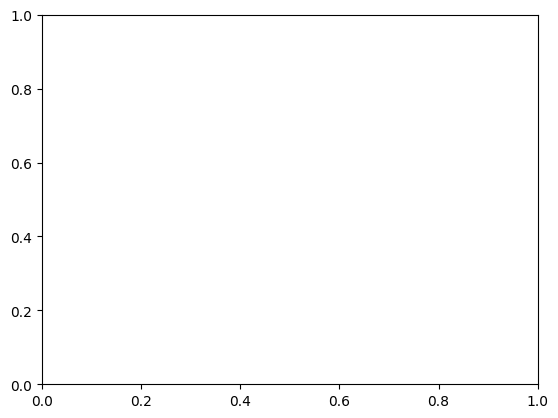

In [137]:
sns.kdeplot(df_procesado['anio_ingreso'])
plt.show()

In [133]:
df_procesado.isnull().sum().sum()

np.int64(0)

In [ ]:
transform = Pipeline(
    steps=[
        ('cat_t', cat_transform),
        # apliocamos RobustScaler sobre el total de filas de salida, incluyendo las codificadas
        ('rob_e', RobustScaler())
    ]
)

## Modelos de linea base


In [ ]:
def cantidad_certificados_discretizado

## GridSearchCV